In [42]:
from sympy import simplify, lambdify, latex, Symbol
from sympy.abc import k, N
from sympy.concrete.summations import summation
import matplotlib.pyplot as plt
import numpy as np
#from sympy.plotting import plot

p = Symbol('p', positive=True)

In [43]:

f1 = p*(1-p)**(N) * (((1-p)**(-1)-(1+N)*((1-p)**(-N-1)))/(1-(1-p)**(-1)) + ((1-p)**(-2))*(1-(1-p)**(-N))/((1-(1-p)**(-1))**2))

f1

p*(1 - p)**N*((-(1 - p)**(-N - 1)*(N + 1) + 1/(1 - p))/(1 - 1/(1 - p)) + (1 - 1/(1 - p)**N)/((1 - p)**2*(1 - 1/(1 - p))**2))

In [44]:
f2 = simplify(f1)

f2

(p*(N - (1 - p)**N + 1) + (1 - p)**N - 1)/p

In [45]:
latex(f2)

'\\frac{p \\left(N - \\left(1 - p\\right)^{N} + 1\\right) + \\left(1 - p\\right)^{N} - 1}{p}'

In [46]:
f3 = N + ((1-p)**(N+1)-(1-p))/p

In [47]:
f4s = summation(k*p*(1-p)**(N-k), (k, 0, N))
f4 = simplify(f4)

In [48]:
fun1 = lambdify((p, N), f1)
fun2 = lambdify((p, N), f2)
fun3 = lambdify((p, N), f3)
fun4 = lambdify((p, N), f4)

fun1v = np.vectorize(fun1, excluded=['N'])
fun2v = np.vectorize(fun2, excluded=['N'])
fun3v = np.vectorize(fun3, excluded=['N'])
fun4v = np.vectorize(fun4, excluded=['N'])

In [49]:
p_=0.7
N_=100
print(fun1(p_, N_))
print(fun2(p_, N_))
print(fun3(p_, N_))
print(fun4(p_, N_))

99.57142857142858
99.57142857142856
99.57142857142857
99.57142857142856


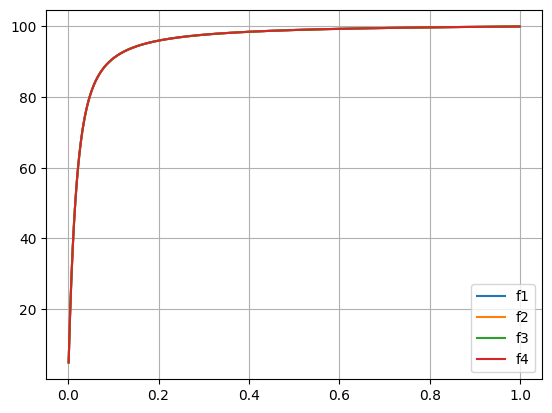

In [50]:
#plot(f2.subs(N, 100), (p, 0.1, 0.9)) #, ylim=(0, 100))

ps = np.linspace(0.001,0.999,1000)
fig, ax = plt.subplots()
ax.plot(ps, fun1v(ps, N_), label='f1')
ax.plot(ps, fun2v(ps, N_), label='f2')
ax.plot(ps, fun3v(ps, N_), label='f3')
ax.plot(ps, fun4v(ps, N_), label='f4')
ax.legend()
ax.grid()

In [51]:
# Variance

fv = summation((k**2)*p*(1-p)**(N-k**2), (k, 0, N))-f4s**2

fv

Sum(k**2*p*(1 - p)**(N - k**2), (k, 0, N)) - (-N*p + p*(1 - p)**N - p - (1 - p)**N + 1)**2/p**2

In [52]:
simplify(fv)

Sum(k**2*p*(1 - p)**(N - k**2), (k, 0, N)) - (N*p - p*(1 - p)**N + p + (1 - p)**N - 1)**2/p**2

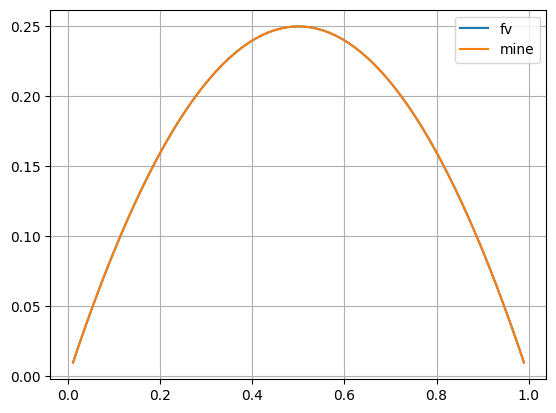

In [89]:
fvl = lambdify((p, N), fv)

#fvl(0.5, 10)
fvv = np.vectorize(fvl, excluded=['N', 'k'])
N_ = 1
ps = np.linspace(0.01,0.99,100)
fig, ax = plt.subplots()
ax.plot(ps, fvv(ps, N_), label='fv')
ax.plot(ps, -(ps-0.5)**2+0.25, label='mine')
#ax.plot(ps, -np.power(fun2v(ps, N_), 2), label='EV^2')
ax.legend()
ax.grid()

In [76]:
fv_mine = -(p - 1/2)**2 + 1/4

fv_mine

0.25 - (p - 0.5)**2